In [1]:
from pathlib import Path

import util
from util import p_, workflow

import automech

file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")
par_mech = workflow.read_parent_mechanism(root_path=root_path)

In [2]:
# # Generate submechanism
# sub_tags = [
#     # 0a v0
#     "A_rh-oh_0a_v0",
#     "B_rh-ho2_0a_v0",
#     "C_r_0a_v0",
#     "D_r-o2_0a_v0",
#     # 1e v0
#     "A_rh-oh_1e-1_v0",
#     "A_rh-oh_1e-2_v0",
#     "B_rh-ho2_1e-1_v0",
#     "B_rh-ho2_1e-2_v0",
#     "C_r_1e_v0",
#     "D_r-o2_1e_v0",
#     # 2x v0
#     "A_rh-oh_2x_v0",
#     "B_rh-ho2_2x_v0",
#     "C_r_2x_v0",
#     "D_r-o2_2x_v0",
#     # 3o v0
#     "C_r_3o_v0",
#     "D_r-o2_3o_v0",
#     # 0a v1
#     "D_r-o2_0a_v1",
#     # 1e v1
#     "D_r-o2_1e_v1",
# ]
# gen_paths = [p_.generated_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# ste_paths = [p_.stereo_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# gen_mechs = [automech.io.read(p) for p in gen_paths]
# ste_mechs = [automech.io.read(p) for p in ste_paths]
# gen_mech = automech.combine_all(gen_mechs)
# ste_mech = automech.combine_all(ste_mechs)
# gen_mech = automech.drop_duplicate_reactions(gen_mech)
# ste_mech = automech.drop_duplicate_reactions(ste_mech)
# ste_mech = automech.drop_noncanonical_enantiomers(ste_mech)
# automech.display(gen_mech)

In [3]:
# # Prepare calculation
# workflow.augment_calculation(
#     gen_mech=gen_mech, ste_mech=ste_mech, tag=tag, root_path=root_path
# )
# # workflow.prepare_calculation(
# #     gen_mech=gen_mech, ste_mech=ste_mech, tag=tag, root_path=root_path, fake_sort=True
# # )

In [4]:
# # Prepare simulation
# workflow.prepare_simulation(tag=tag, root_path=root_path)
# workflow.prepare_simulation_species(tag=tag, root_path=root_path)

In [5]:
# # Check rates
# workflow.plot_rates(tag=tag, root_path=root_path)

In [6]:
# # Plot simulation
# chart_dct = workflow.plot_simulation(
#     tag=tag,
#     x_col="O2_molecules",
#     root_path=root_path,
#     line_source_=["Hill", "Lokachari"],
#     point_source="Experiment",
#     control=False,
# )
# mech = automech.io.read(
#     p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
# )
# for name, chart in chart_dct.items():
#     automech.display_species(mech, [name])
#     chart.show()

In [7]:
# Display species/reaction by ID
id_ = "53: 1"

#   - Read in expanded mechanism
mech_path = p_.stereo_mechanism(tag, ext="json", path=p_.data(root_path))
mech = automech.io.read(mech_path)

#   - Display the reaction
if ":" in id_:
    automech.display_reactions(mech, chans=[id_])
else:
    automech.display_species(mech, ids=[id_])


*********
Reaction: S(725)r0 = C5H8O(829)rs + OH(4)
Translations:
  smiles:
    reactants = ['OO[C@H]1C[CH]CC1']
    products = ['C1C[C@@H]2C[C@H]1O2', '[OH]']
Rate parameters:
  This work:
    S(725)r0 = C5H8O(829)rs + OH(4)                              1.000      0.000      0.000
        PLOG  /  0.0009870  8.530E+16     -3.080      20020/
        PLOG  /  0.0009870  7.880E+10     0.1300      26430/
        PLOG  /   0.009870  2.020E+28     -6.050      24540/
        PLOG  /   0.009870  1.860E+25     -3.990      34060/
        PLOG  /    0.09870  1.320E+21     -3.230      24070/
        PLOG  /    0.09870 3.090E+152     -40.43     117200/
        PLOG  /     0.9870  1.900E+25     -4.200      27240/
        PLOG  /     0.9870  5.780E+43     -11.43      27350/
        PLOG  /      9.870  5.830E+28     -5.030      31060/
        PLOG  /      9.870  3.800E+15     -1.410      22570/
        PLOG  /      98.70  2.110E+17     -1.530      26300/
        PLOG  /      98.70  9.960E+10    0.07

alt.Chart(...)

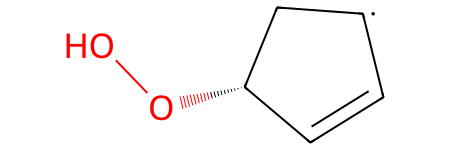

In [8]:
import automol

automol.smiles.display("OO[C@H]1C=C[CH]C1")